In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
# Flow of  project 
# 0. preprocess + EDA + Feature selection
# 1. Extract input and output column  
# 2. Train test Split
# 3. scale the value 
# 4. train the model 
# 5. Evaluate the model / model selection 
# 6. deploye 

In [5]:
 # 0. preprocess + EDA + Feature selection


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [7]:
df = df.iloc[:,1:]

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [9]:
import matplotlib.pyplot as plt 

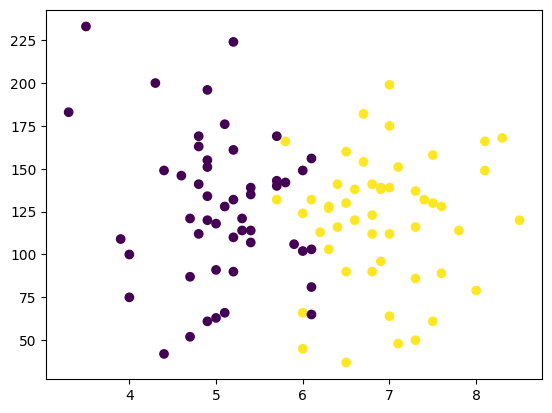

In [22]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [36]:
# 1. Extract input and output column 
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [34]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [38]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [56]:
# 3. Train test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1)

In [58]:
X_train

,cgpa,iq
56,6.1,65.0
10,6.0,45.0
19,5.2,132.0
84,5.7,169.0
75,4.8,169.0
...,...,...
40,4.9,134.0
13,6.4,116.0
35,6.8,90.0
58,8.0,79.0


In [60]:
y_train

56    0
10    1
19    0
84    0
75    0
     ..
40    0
13    1
35    1
58    1
72    1
Name: placement, Length: 90, dtype: int64

In [62]:
X_test

,cgpa,iq
97,6.7,182.0
53,8.3,168.0
5,7.1,48.0
69,8.5,120.0
51,4.8,141.0
25,5.0,91.0
70,6.3,127.0
85,5.8,166.0
62,6.0,102.0
11,6.9,138.0


In [68]:
# 2. scale the value 
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()

In [72]:
X_train = scaler.fit_transform(X_train)

In [86]:
X_test

array([[ 0.68892637,  1.47889568],
       [ 2.12046167,  1.12764053],
       [ 1.04681019, -1.88311787],
       [ 2.29940358, -0.07666283],
       [-1.01102181,  0.45021989],
       [-0.8320799 , -0.80426278],
       [ 0.33104254,  0.09896474],
       [-0.11631224,  1.07746123],
       [ 0.06262967, -0.52827659],
       [ 0.86786828,  0.37495093]])

In [84]:
X_test = scaler.transform(X_test)

In [88]:
X_test

array([[ 0.68892637,  1.47889568],
       [ 2.12046167,  1.12764053],
       [ 1.04681019, -1.88311787],
       [ 2.29940358, -0.07666283],
       [-1.01102181,  0.45021989],
       [-0.8320799 , -0.80426278],
       [ 0.33104254,  0.09896474],
       [-0.11631224,  1.07746123],
       [ 0.06262967, -0.52827659],
       [ 0.86786828,  0.37495093]])

In [90]:
# 4. train the model 
from sklearn.linear_model import LogisticRegression

In [92]:
clf = LogisticRegression()

In [94]:
clf.fit(X_train,y_train)

LogisticRegression()

In [108]:
# 5. Evaluate the model / model selection 
# ye jp model predict kiya h
y_pred=clf.predict(X_test)


In [98]:
# ye actual prediction hai jo dataset me h 
y_test

97    1
53    1
5     1
69    1
51    0
25    0
70    1
85    1
62    0
11    1
Name: placement, dtype: int64

In [102]:
from sklearn.metrics import accuracy_score

In [110]:
accuracy_score(y_test,y_pred)

0.8

In [118]:
# hum decision boundry (best fit line )bhi dekh skte hai vo kyahai 

from mlxtend.plotting import plot_decision_regions

<Axes: >

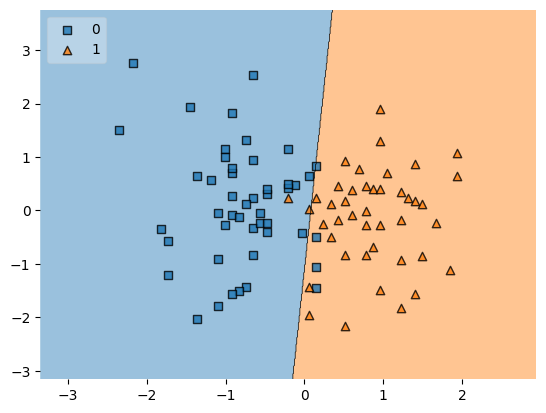

In [120]:
plot_decision_regions(X_train,y_train.values , clf = clf , legend = 2)

In [122]:
import pickle

In [124]:
pickle.dump(clf,open('placement_model.pkl','wb'))

In [ ]:
streamlit run main.py
